# Pipeline para tomar las predicciones y generar histogramas de uso de suelo

Los pasos son :

1. Juntar los resultados de cada combincación `region/ciudad/año` en un solo mapa `.tif` (`merge_results.sh`)
2. Aplicar un filtro de medianas a las imágenes obtenidas en 1 (`filter_images.sh`)
3. Generar histogramas  y mapas de uso de suelo (`make_plots.py`)

In [1]:
root_path = '/ap-siu-habitat'

filter_size = 5

resultados_finales_path = '{}/data/resultados/finales'.format(root_path)

output_path = '{}/data/histogramas'.format(root_path)
oiriginal_img_path = '{}/data/imagenes_orig'.format(root_path)
result_image_path = '_mean/image_mean{}.tif'.format(filter_size)

## Merge de resultados por año

Usaremos el script `merge_results.sh` al cual hay que indicar en el primer parametro, donde estan los resultados de aplicar modelos de clasificación. Debemos pasar la ruta raíz donde deben estár a partir de ahi los archivos organizados en un patron `region/ciudad/año`


In [2]:
!script/merge_results.sh $resultados_finales_path

## Filtro de medianas

Usando el script `filter_images.sh` al cual hay que indicar en el primer parametro el tamaño del filtro y en el segundo el mismo path anteriormente mencionado.

In [3]:
!script/filter_images.sh $filter_size $resultados_finales_path  

# Generación de estadísticas

Usaremos el script `make_plots.py` al cual hay que indicar los siguientes parametros:

* `--results-dir` : ruta raíz donde deben estár a partir de ahi los archivos organizados en un patron `region/ciudad/año`
* `--images-dir` : ruta raíz a una carpeta siguiendo al patron `region/ciudad` donde debe haber un archivo `año.vrt` por cada año, resultado de extraer las features de ese año y las carpetas necesarias que cada vrt referencia
* `--output-dir` : path al directorio donde irán los plots por cada region-ciudad
* `--result-image-path`:  path a la imagen raster luego de filtro de medianas como está dentro del directorio `año/`


In [4]:
!python3 script/make_plots.py --results-dir $resultados_finales_path --images-dir $oiriginal_img_path --output-dir $output_path --result-image-path $result_image_path

*** centro/concordia ***
years = [2016, 2018]
/ap-siu-habitat/data/histogramas/centro/concordia/hist.png written
/ap-siu-habitat/data/histogramas/centro/concordia/2016_map.png written
/ap-siu-habitat/data/histogramas/centro/concordia/2018_map.png written
Calculate percentiles for /ap-siu-habitat/data/imagenes_orig/centro/concordia/2016.vrt
[/ap-siu-habitat/data/imagenes_orig/centro/concordia/2016.vrt] Process band 1
100%|########################################| 160/160 [00:00<00:00, 659.74it/s]
[/ap-siu-habitat/data/imagenes_orig/centro/concordia/2016.vrt] Process band 2
100%|#######################################| 160/160 [00:00<00:00, 1546.65it/s]
[/ap-siu-habitat/data/imagenes_orig/centro/concordia/2016.vrt] Process band 3
100%|#######################################| 160/160 [00:00<00:00, 1305.80it/s]
[/ap-siu-habitat/data/imagenes_orig/centro/concordia/2016.vrt] Read image
[/ap-siu-habitat/data/imagenes_orig/centro/concordia/2016.vrt] Render map
/ap-siu-habitat/data/histogramas/

Observamos los mapas e histogramas generados para mostrar estadísticas de uso del suelo 

/ap-siu-habitat/data/histogramas/**/*.png
Imagen resultado : /ap-siu-habitat/data/histogramas/centro/concordia/2016_image.png


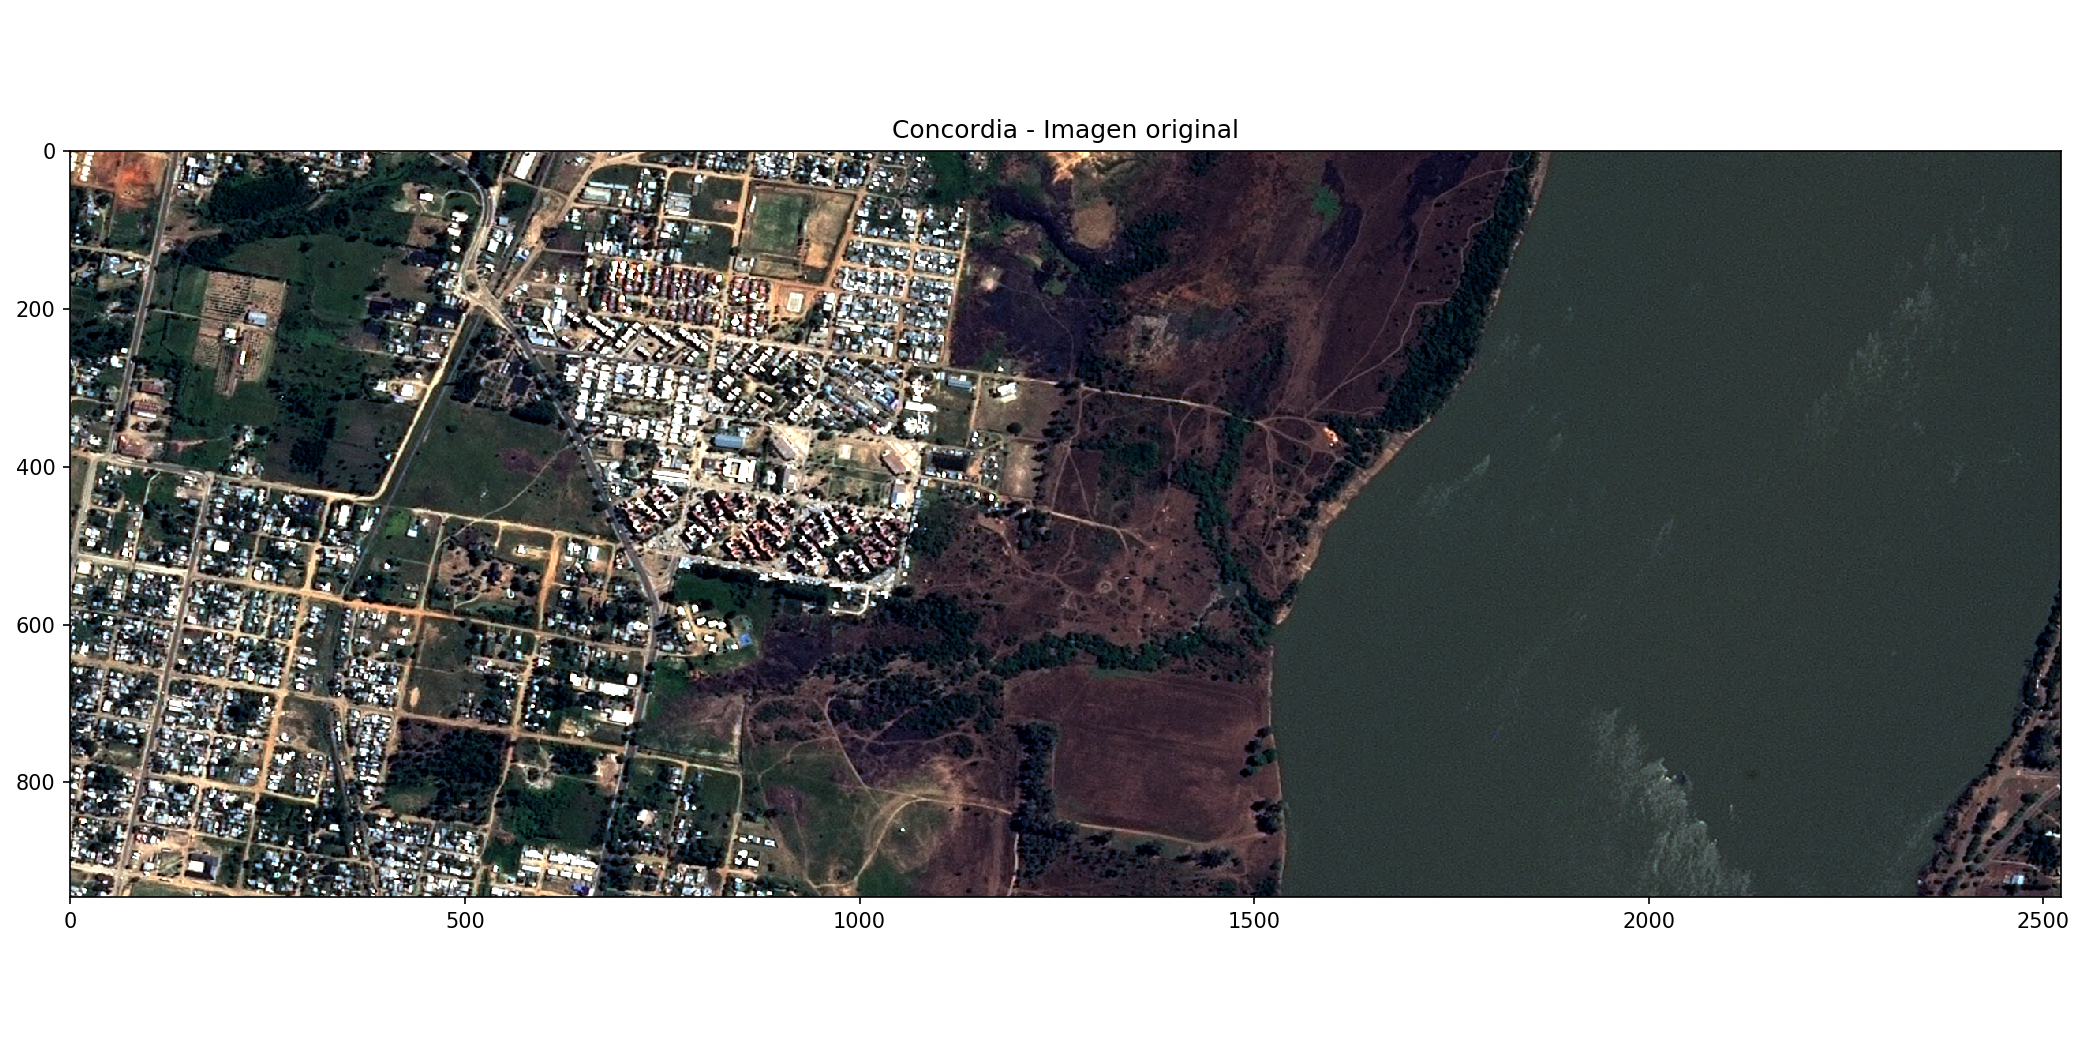

Imagen resultado : /ap-siu-habitat/data/histogramas/centro/concordia/2016_map.png


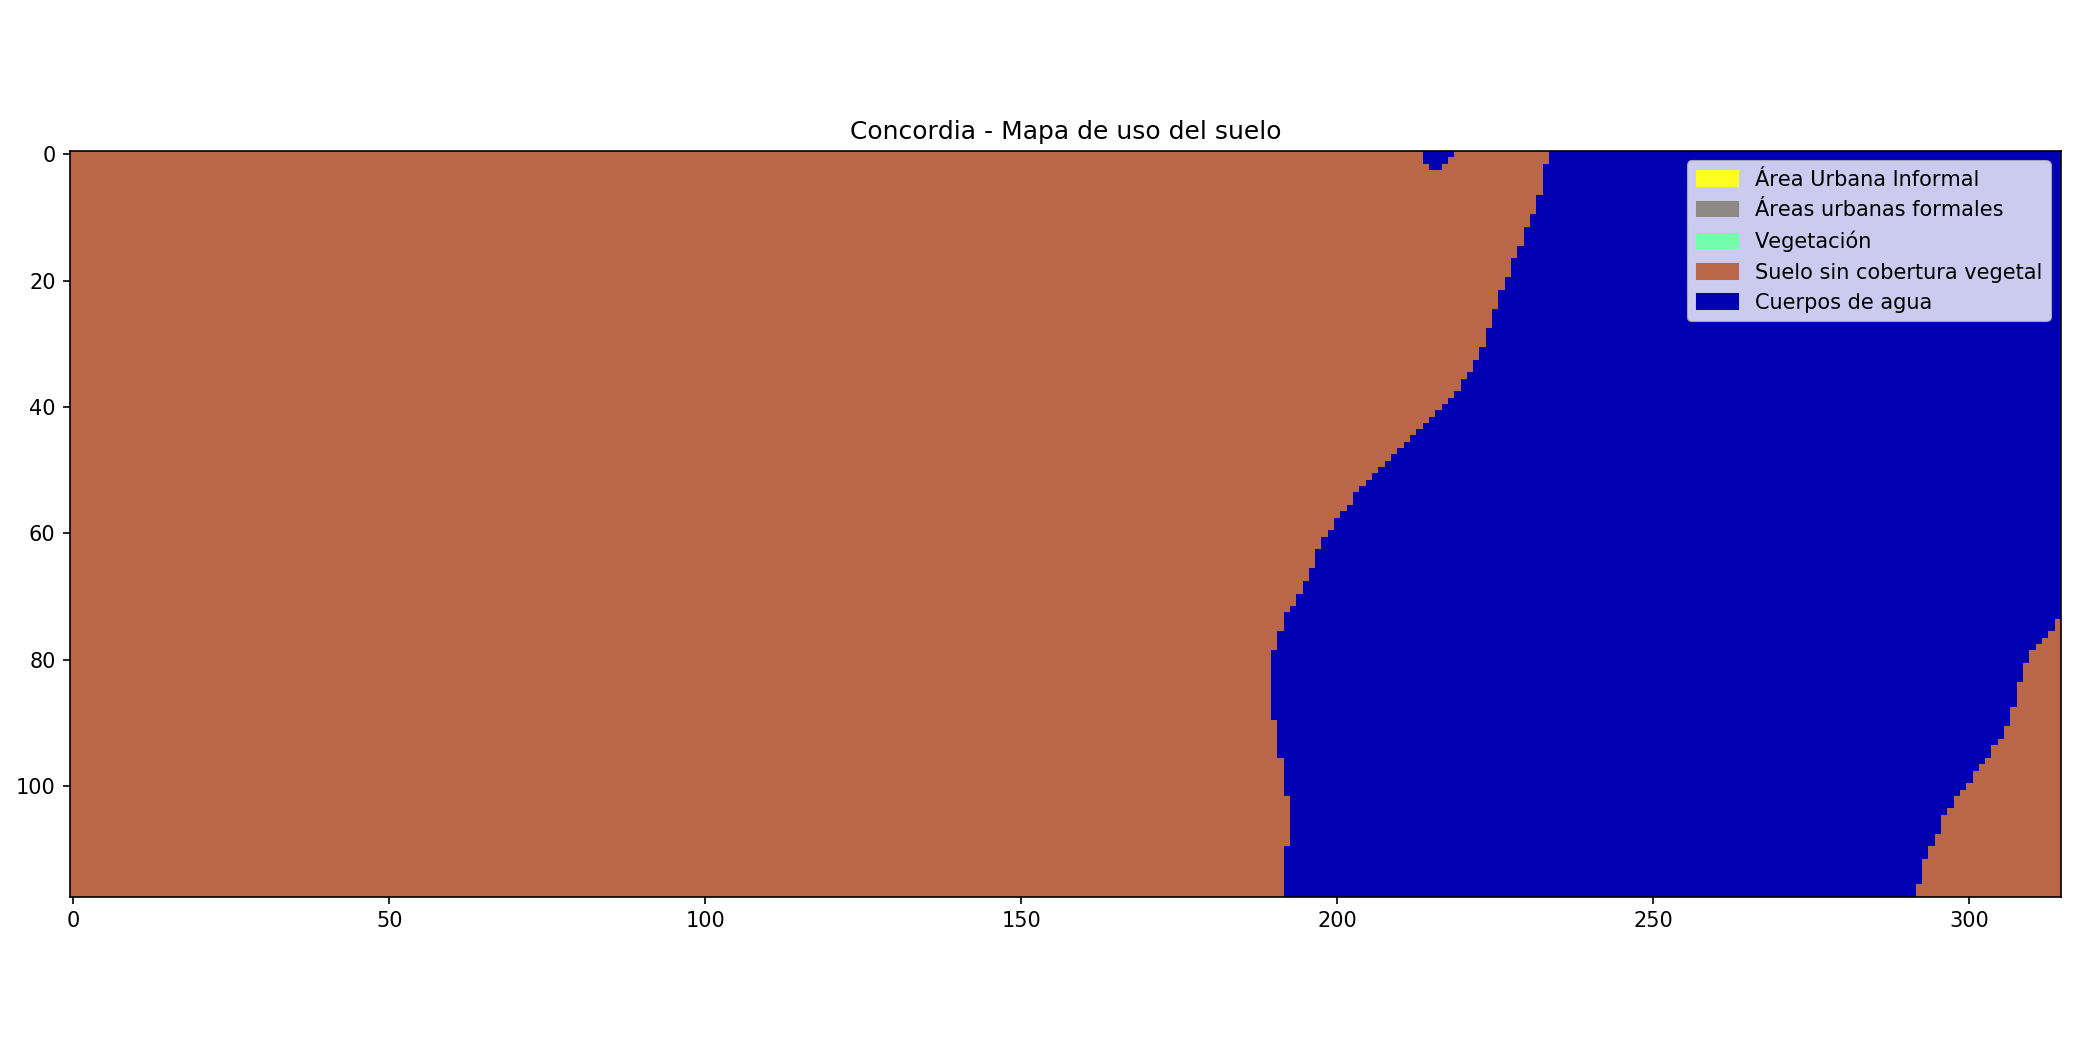

Imagen resultado : /ap-siu-habitat/data/histogramas/centro/concordia/2018_image.png


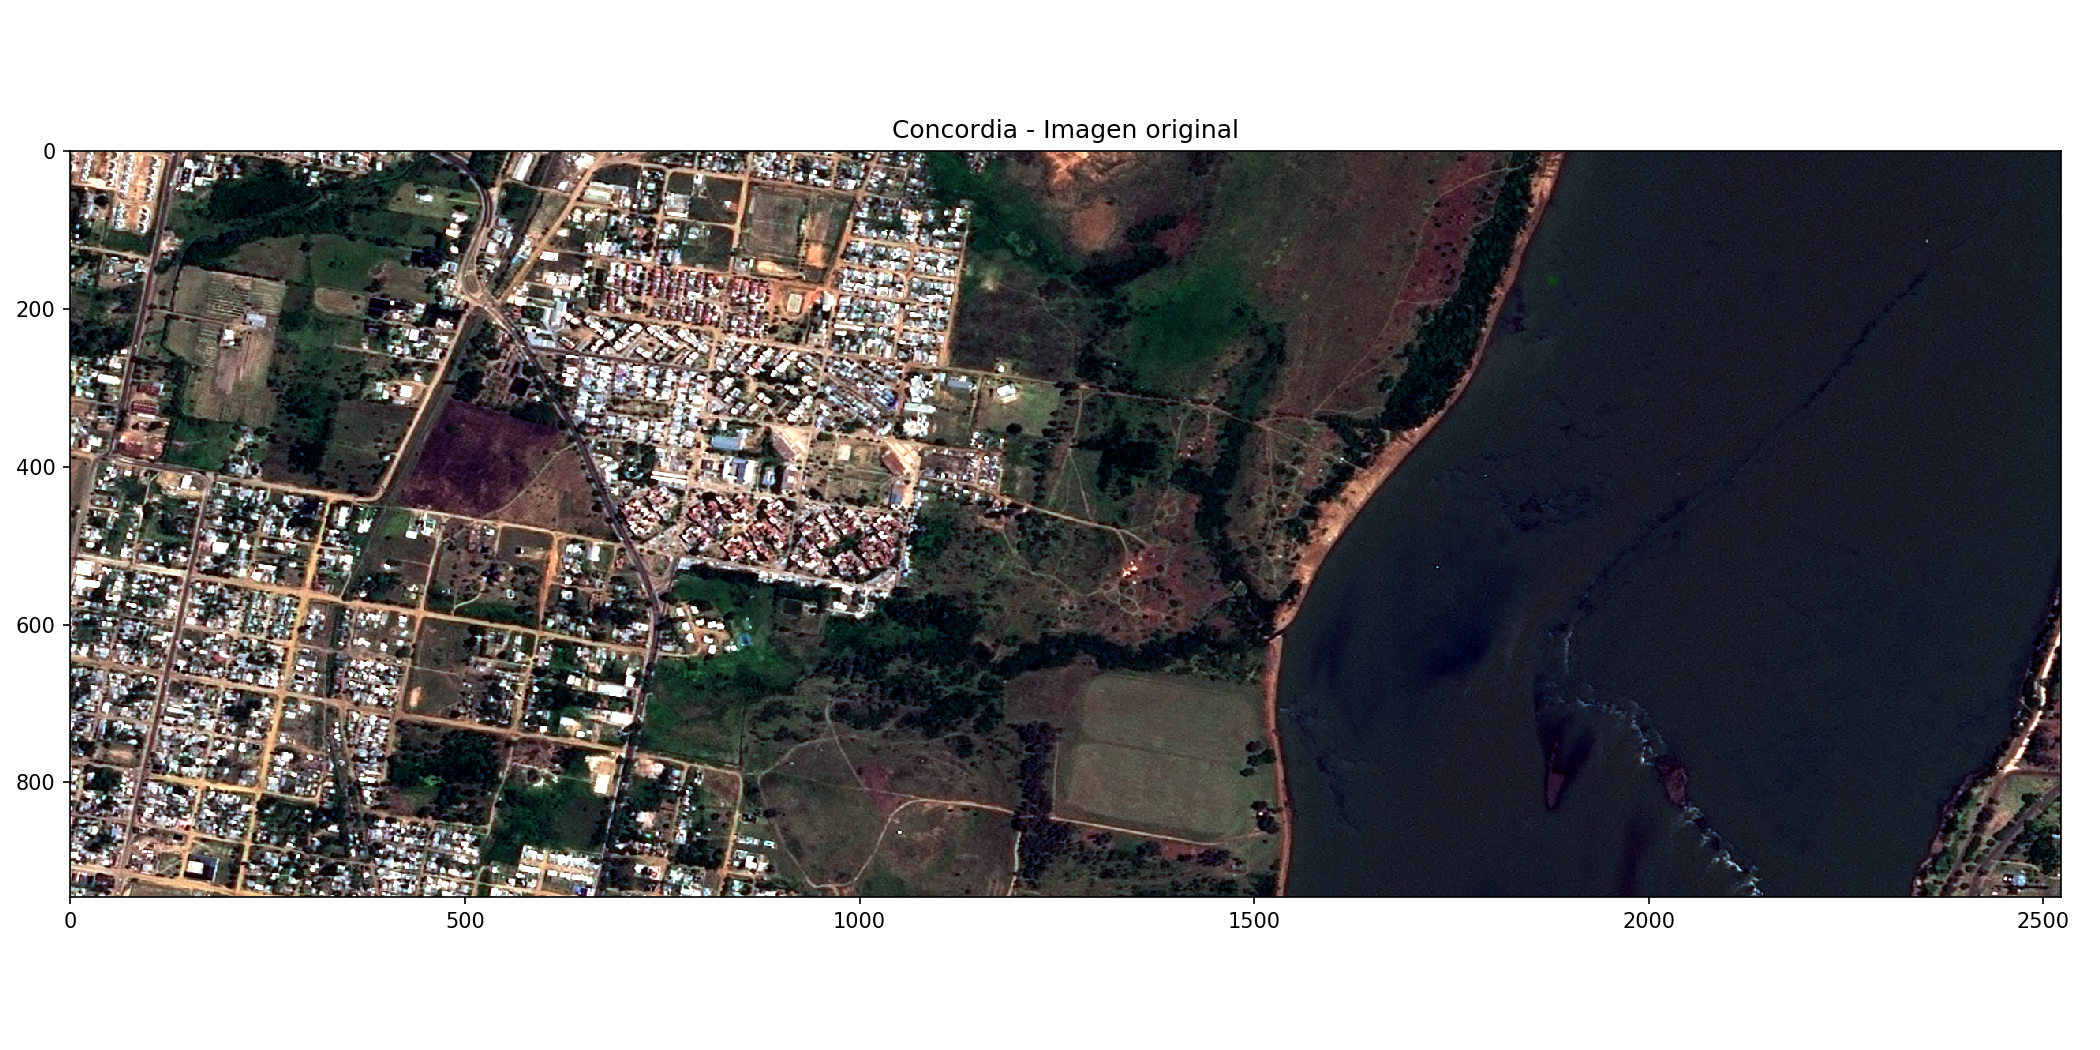

Imagen resultado : /ap-siu-habitat/data/histogramas/centro/concordia/2018_map.png


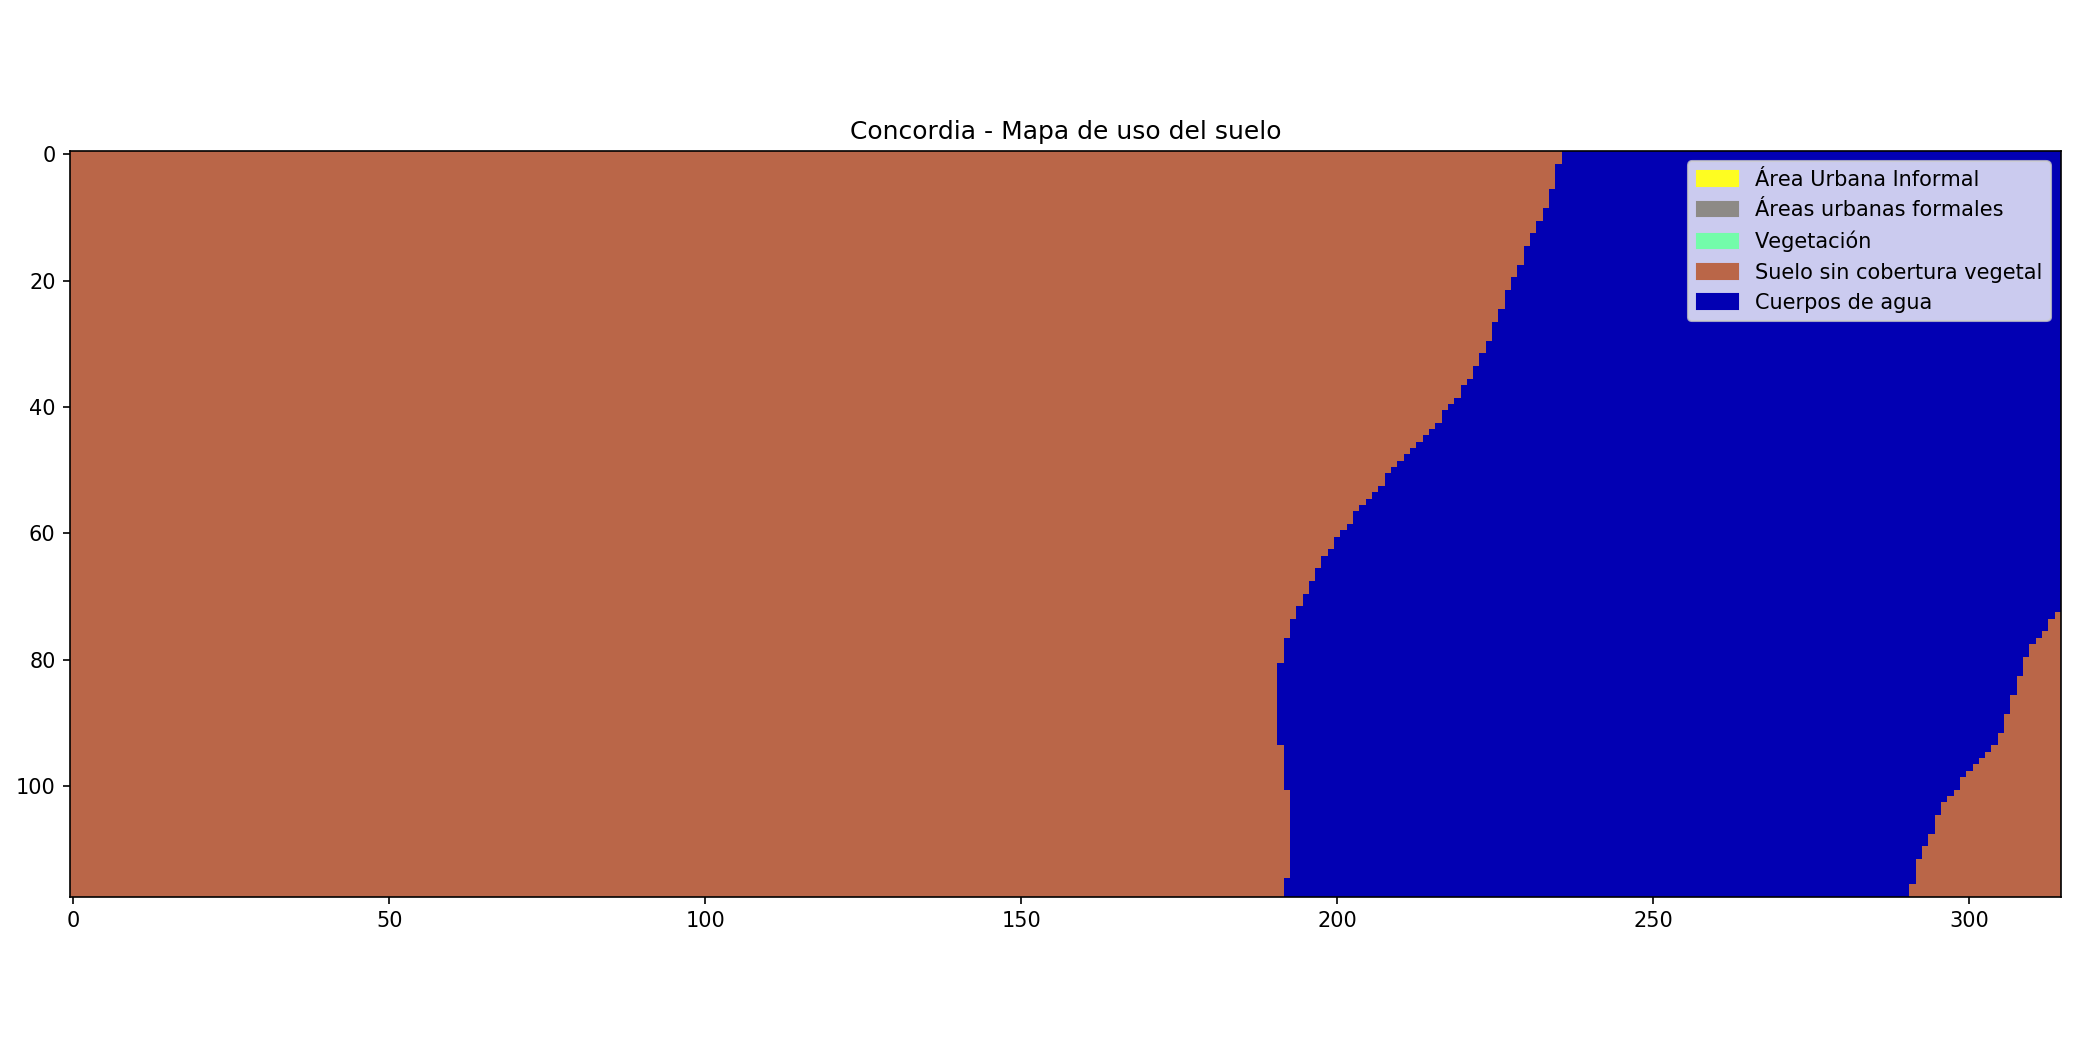

Imagen resultado : /ap-siu-habitat/data/histogramas/centro/concordia/hist.png


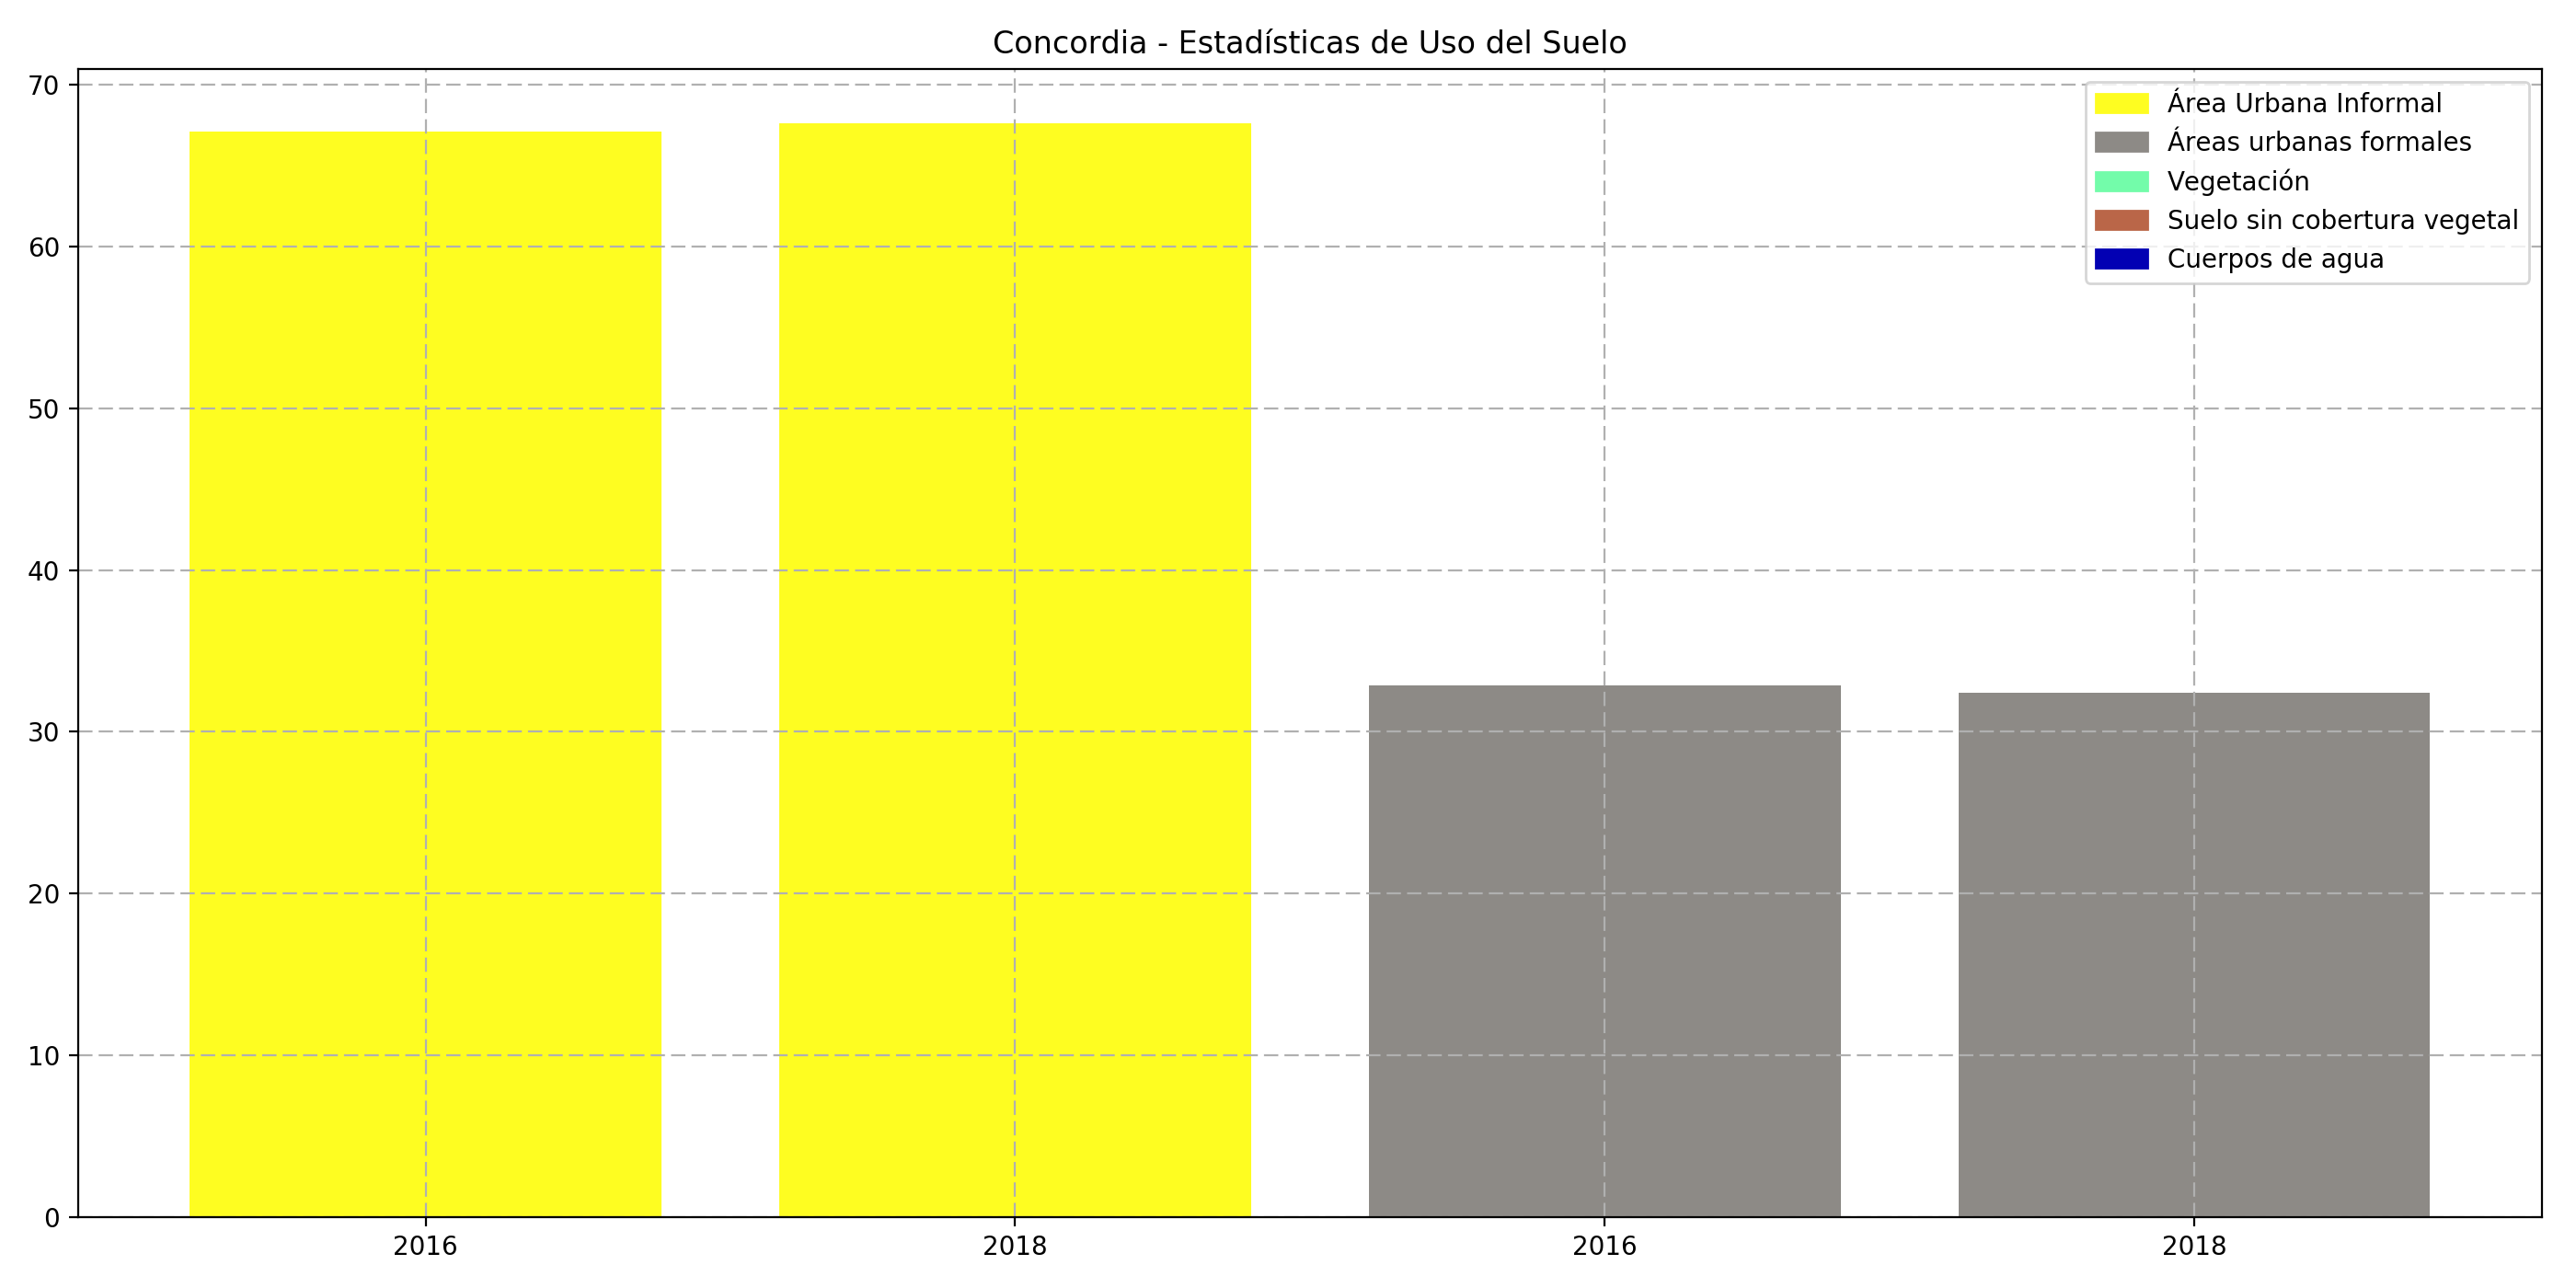

In [5]:
from IPython.display import Image, display
import glob
import os

images_result_path = '{}/**/*.png'.format(output_path)
print(images_result_path)

listOfImageNames = glob.glob(images_result_path,recursive=True)

for imageName in sorted(listOfImageNames):
    print('Imagen resultado : {}'.format(imageName))
    display(Image(filename=imageName))